(5, 256, 256, 1) (5, 256, 256, 3)
0 18
-1.0 1.0


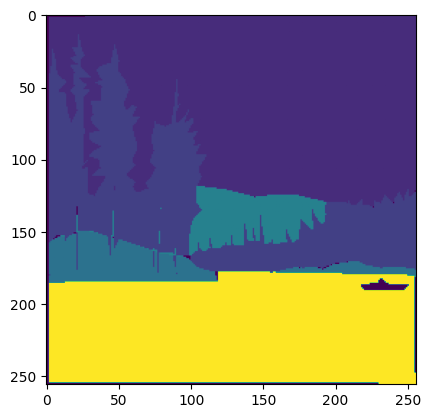

In [6]:
from matplotlib import pyplot as plt
from dataset import DataIterator, load_dataset
from keras import Sequential
from keras.layers import (
    Conv2D,
    Input,
)

dataset = load_dataset('data/ADE20K/24_classes.npy', 'data/ADE20K/images.npy')
masks, images = dataset

# masks.shape -> 90000, 256, 256, 1 -> (0, 24)   | uint8
# images.shape -> 90000, 256, 256, 3 -> (0, 255) | uint8

model = Sequential(
    [
        Input((256, 256, 25)),
        Conv2D(8, 4, padding='same'),
        Conv2D(1, 4, padding='same', activation='tanh')
    ]
)
model.compile(loss='mse')

# as_categorical -> masks.shape -> 90000, 256, 256, 1 -> ..., 25 -> one hot
#
di = DataIterator(dataset, 5, as_categorical=False)
di.on_epoch_end()
for epoch in range(5):
    for _mask, _image in di:
        print(_mask.shape, _image.shape)
        print(_mask.min(), _mask.max())
        print(_image.min(), _image.max())
        plt.imshow(_mask[0])
        plt.show()
        # model.train_on_batch(_mask, _image)
        break
    di.on_epoch_end()
    break

# PatchGAN - Mikołaj
# GAUGAN - Łukasz
# Double Discriminator PatchGAN - Adrian

1. Skrypt dataset
2. 157 linijka na True
3. Podać właściwy classes_path
4. uruchomić skrypt

1. Logowanie kodu modelu który uczymy -> inspect.getsource(GAN_Training) -> str
2. Wyświetlanie tego co produkuje GAN co pewien krok/każdą epokę
3. GAN produkuje czarne/zielone/czerwone obraz -> coś jest nie tak z modelem (za duży, za mały, generator się uczy za szybko, dyskryminator się uczy za wolno)
4. learning rate -> dyskryminator powinien mieć większy lr niż generator (uczony przez dyskryminato) np.: D: 4e-4, G: 1e-4 
